The dataset you're given (mm.csv) contains information about vehicle colision reports in the Monterrey Metropolitan area.

Analyze the data and answer the following questions based on it.

Please be sure to reply back to us with your answers and attach the source code you used to answer them (it can be a Jupyter notebook, an Rmd script, an R script, a Python script, an Excel spreadsheet, etc.)

## Questions


1. Which roads "appear to be" the top 10 most dangerous roads of Monterrey Metropolitan area?
<b></b>
2. What's the age group with the overall highest number of reported colisions? You can consider any age groupings for the purposes of this question. Explain this in a graphical way.
<b></b>
3. If you were to see a collision in the "Garza Sada" road, What would be the odds for that person to have any type of positive alcohol ingestion opinion?
<b></b>
4. Why do you think we use the phrase "appear to be" in question 1? What would you need to be able to speak with more confidence about the answer to that question?
<b></b>
5. What modelling project would you push to develop from the conclusions in this dataset?


In [1]:
#Importar librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [17]:
#df = pd.read_csv('220709COVID19MEXICO.csv')
df = pd.read_csv('mm.csv', encoding = "latin-1")
df.head(10)

,ANIO_NACIMIENTO,MES_NACIMIENTO,MES_NACIMIENTOD,DIA_NACIMIENTO,EDAD,ESTADO_CONYUGAL,ESTADO_CONYUGALD,ENTIDAD_RESIDENCIA,ENTIDAD_RESIDENCIAD,MUNICIPIO_RESIDENCIA,...,DIA_REGISTRO,ANIO_CERTIFICACION,MES_CERTIFICACION,MES_CERTIFICACIOND,DIA_CERTIFICACION,ANIO_BASE_DATOS,RAZON_MORTALIDAD_MATERNA,RAZON_MORTALIDAD_MATERNAD,EDAD_QUINQUENAL,EDAD_QUINQUENALD
0,0,0,NO ESPECIFICADO,0,35,4,UNION LIBRE,8,CHIHUAHUA,29,...,5,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,6,35 a 39 años
1,0,0,NO ESPECIFICADO,0,20,5,CASADO,8,CHIHUAHUA,47,...,6,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,3,20 a 24 años
2,1962,7,JULIO,12,39,5,CASADO,12,GUERRERO,20,...,24,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,6,35 a 39 años
3,1974,2,FEBRERO,10,27,5,CASADO,12,GUERRERO,41,...,17,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,4,25 a 29 años
4,1980,4,ABRIL,18,20,4,UNION LIBRE,18,NAYARIT,9,...,15,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,3,20 a 24 años
5,1977,3,MARZO,9,24,5,CASADO,15,MÉXICO,60,...,1,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,3,20 a 24 años
6,1986,9,SEPTIEMBRE,7,15,4,UNION LIBRE,24,SAN LUIS POTOSÍ,54,...,2,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,2,15 a 19 años
7,1981,4,ABRIL,24,20,5,CASADO,12,GUERRERO,28,...,2,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,3,20 a 24 años
8,1968,5,MAYO,3,33,5,CASADO,17,MORELOS,8,...,1,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,5,30 a 34 años
9,1979,1,ENERO,0,22,1,SOLTERO,30,VERACRUZ DE IGNACIO DE LA LLAVE,39,...,0,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,3,20 a 24 años


In [18]:
df.columns

Index(['ANIO_NACIMIENTO', 'MES_NACIMIENTO', 'MES_NACIMIENTOD',
       'DIA_NACIMIENTO', 'EDAD', 'ESTADO_CONYUGAL', 'ESTADO_CONYUGALD',
       'ENTIDAD_RESIDENCIA', 'ENTIDAD_RESIDENCIAD', 'MUNICIPIO_RESIDENCIA',
       'MUNICIPIO_RESIDENCIAD', 'LOCALIDAD_RESIDENCIA',
       'LOCALIDAD_RESIDENCIAD', 'TAMANIO_LOCALIDAD', 'TAMANIO_LOCALIDADD',
       'OCUPACION_HABITUAL', 'OCUPACION_HABITUALD', 'ESCOLARIDAD',
       'ESCOLARIDADD', 'DERECHOHABIENCIA', 'DERECHOHABIENCIAD',
       'ENTIDAD_OCURRENCIA', 'ENTIDAD_OCURRENCIAD', 'MUNICIPIO_OCURRENCIA',
       'MUNICIPIO_OCURRENCIAD', 'LOCALIDAD_OCURRENCIA',
       'LOCALIDAD_OCURRENCIAD', 'SITIO_DEFUNCION', 'SITIO_DEFUNCIOND',
       'ANIO_DEFUNCION', 'MES_DEFUNCION', 'MES_DEFUNCIOND', 'DIA_DEFUNCION',
       'HORA_DEFUNCION', 'MINUTOS_DEFUNCION', 'ASISTENCIA_MEDICA',
       'ASISTENCIA_MEDICAD', 'CAUSA_CIE_4', 'CAUSA_CIE_4D', 'CERTIFICO',
       'CERTIFICOD', 'ENTIDAD_REGISTRO', 'ENTIDAD_REGISTROD',
       'MUNICIPIO_REGISTRO', 'MUNICIPIO_REGIS

In [51]:
# 10 Edades con mayor cantidad de defunciones
df['EDAD'].value_counts().sort_values(ascending = False).head(10)

30    907
29    889
22    879
23    871
28    868
32    862
27    853
31    847
33    837
26    829
Name: EDAD, dtype: int64

In [47]:
# Estados ordenados de mayor a menor cantidad de defunciones
df['ENTIDAD_RESIDENCIAD'].value_counts().sort_values(ascending = False)

MÉXICO                             2830
CHIAPAS                            1462
VERACRUZ DE IGNACIO DE LA LLAVE    1440
CIUDAD DE MÉXICO                   1289
PUEBLA                             1167
GUERRERO                           1099
JALISCO                             987
OAXACA                              986
GUANAJUATO                          827
MICHOACÁN DE OCAMPO                 788
CHIHUAHUA                           771
HIDALGO                             498
TAMAULIPAS                          450
BAJA CALIFORNIA                     431
NUEVO LEÓN                          431
SAN LUIS POTOSÍ                     430
COAHUILA DE ZARAGOZA                388
TABASCO                             379
SONORA                              363
DURANGO                             342
SINALOA                             337
YUCATÁN                             307
QUERÉTARO ARTEAGA                   278
MORELOS                             277
QUINTANA ROO                        242


In [46]:
# Ordenado por escolaridad
df['ESCOLARIDADD'].value_counts().sort_values(ascending = False)

SECUNDARIA COMPLETA                       4888
PRIMARIA COMPLETA                         3778
PRIMARIA INCOMPLETA                       2869
BACHILLERATO O PREPARATORIA COMPLETA      2576
PROFESIONAL                               1834
NINGUNA                                   1621
SECUNDARIA INCOMPLETA                     1067
NO ESPECIFICADA                            773
BACHILLERATO O PREPARATORIA INCOMPLETA     477
POSGRADO                                    40
PREESCOLAR                                   9
Name: ESCOLARIDADD, dtype: int64

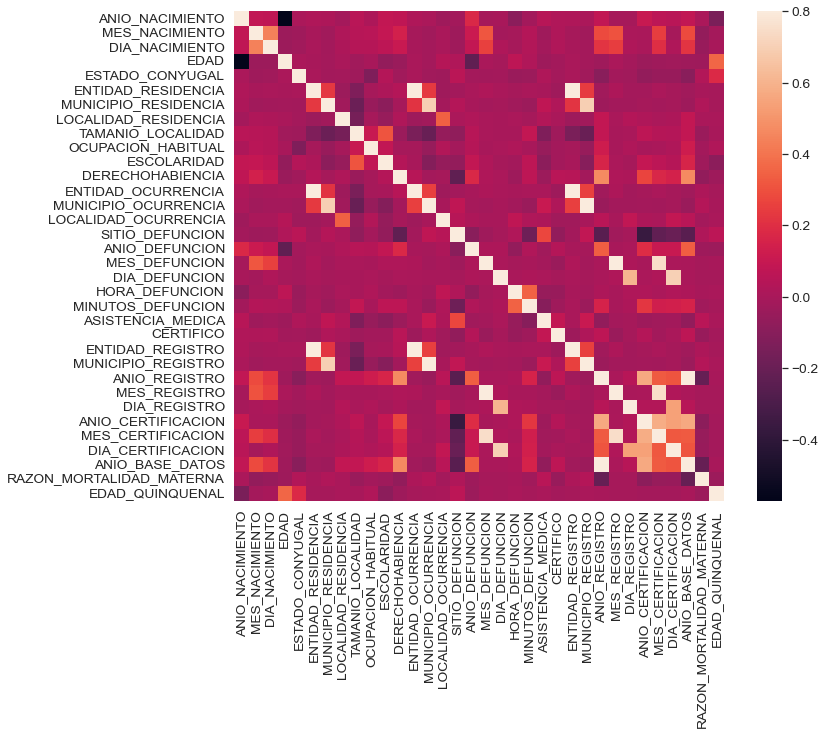

In [27]:
# Matriz de correlación:

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

<AxesSubplot:>

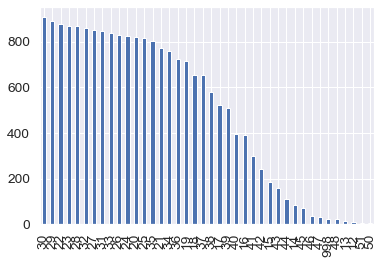

In [57]:
# Grafica por edad
df['EDAD'].value_counts()[0:40].plot(kind='bar')

In [43]:
#Grupos por edad
def convert_to_number(x):
    try:
        return float(x)
    except:
        return np.nan
    return x

<AxesSubplot:>

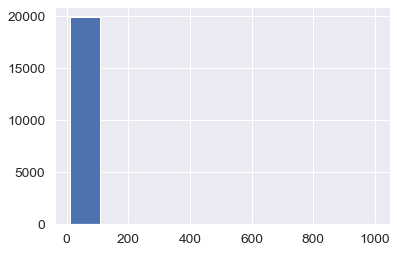

In [44]:
df['EDAD'].apply(convert_to_number).hist()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


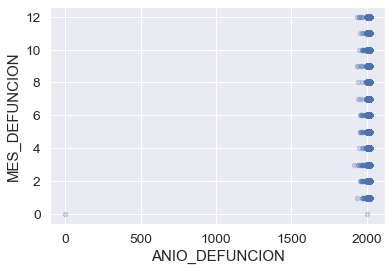

In [67]:
# Diagrama de dispersión grlivarea/saleprice:

var = 'ANIO_DEFUNCION'
data = pd.concat([df['MES_DEFUNCION'], df[var]], axis=1)
data.plot.scatter(x=var, y='MES_DEFUNCION', alpha = 0.25);

In [ ]:
#Concluiones 

Mediante la obtención de los 10 resultados más altos por se eligió las columnas de edad, estado y escolaridad, 
aparenta ser 30 años, en México y con una escolaridad de secundaria completa. 
Se concluye que aparenta ser, debido a que existe la posibilidad de que exista una mayor cantidad de defunciones
que no sean regisradas, por lo tanto, esto es un acercamiento del riesgo en estos dichos campos.

In [ ]:
#Concluiones 

Mi propuesta es sugerir un seguimiento cercano con la actulización de datos para que mediante el 
uso de gráficos es más sencillo comparar la cantidad de defunciones e identificar con qué otros datos existe
un patrón para tomar decisiones. Un Histograma fue una buena opción, sin embargo, es importante continuar 
explorando con los datos qué otra gráfica puede ayudar para leer de manera sencilla y encontrar resultados que no
habían logrado ser identificados anteriormente.
Uno de estos resultados fue encontrar al obtener los 10 resultados más altos, es sorprendente ver la cantidad en
relación a la escolaridad, por mencionar un ejemplo.